<a href="https://colab.research.google.com/github/KacperHaras/Delivery_Time_Predictions_DA_project/blob/main/Kacper_Haras_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
orders = pd.read_csv('orders.csv')
orders_products = pd.read_csv('orders_products.csv')
products = pd.read_csv('products.csv')
route_segments = pd.read_csv('route_segments.csv')

**Data inspection:**

In [ ]:
#orders.info()
#orders_products.info()
#products.info()
#route_segments.info()

orders.describe()

,order_id,customer_id,sector_id,planned_delivery_duration
count,2240.000000,2240.000000,2240.000000,2240.00000
mean,1119.500000,161.483482,2.017857,176.88750
std,646.776623,92.169624,0.819941,4.96543
min,0.000000,0.000000,1.000000,169.00000
25%,559.750000,84.750000,1.000000,175.00000
50%,1119.500000,161.000000,2.000000,176.00000
75%,1679.250000,245.000000,3.000000,177.00000
max,2239.000000,319.000000,3.000000,200.00000


In [ ]:
orders_products.describe()

,order_id,product_id,quantity
count,6739.000000,6739.000000,6739.000000
mean,1123.417718,49.580798,2.013652
std,649.630321,28.784253,0.820734
min,0.000000,0.000000,1.000000
25%,556.500000,25.000000,1.000000
50%,1128.000000,49.000000,2.000000
75%,1688.000000,74.000000,3.000000
max,2239.000000,99.000000,3.000000


In [ ]:
products.describe()

,product_id,weight
count,100.000000,100.000000
mean,49.500000,1072.920000
std,29.011492,568.785942
min,0.000000,140.000000
25%,24.750000,599.250000
50%,49.500000,1055.000000
75%,74.250000,1539.000000
max,99.000000,1997.000000


In [ ]:
route_segments.head()

,segment_id,driver_id,segment_type,order_id,segment_start_time,segment_end_time
0,0,4,STOP,1312.0,2024-02-09 14:58:42,2024-02-09 15:01:56
1,1,4,DRIVE,NaN,2024-02-09 14:51:20,2024-02-09 14:55:42
2,2,4,STOP,1273.0,2024-02-24 09:26:31,2024-02-24 09:32:12
3,3,4,DRIVE,NaN,2024-02-24 09:15:02,2024-02-24 09:23:31
4,4,1,STOP,1036.0,2024-02-24 20:26:23,2024-02-24 20:26:23


Changing some of collumns or creating new ones:

In [ ]:
route_segments['segment_end_time'] = pd.to_datetime(route_segments['segment_end_time'])
route_segments['segment_start_time'] = pd.to_datetime(route_segments['segment_start_time'])


In [ ]:
route_segments['segment_duration'] = (route_segments.loc[:, 'segment_end_time'] - route_segments.loc[:, 'segment_start_time']).dt.total_seconds().astype(int)
route_segments['segment_duration_minutes'] = route_segments.loc[:, 'segment_duration'] / 60

In [ ]:
route_segments.describe()

,segment_id,driver_id,order_id,segment_start_time,segment_end_time,segment_duration,segment_duration_minutes
count,4991.000000,4991.000000,2257.000000,4991,4991,4991.000000,4991.000000
mean,2495.000000,2.487077,1119.440851,2024-02-14 19:55:54.195552,2024-02-14 20:03:10.257062912,436.061511,7.267692
min,0.000000,1.000000,0.000000,2024-02-01 01:48:42,2024-02-01 01:48:42,-994.000000,-16.566667
25%,1247.500000,1.000000,559.000000,2024-02-07 21:43:14,2024-02-07 22:01:20,137.000000,2.283333
50%,2495.000000,3.000000,1119.000000,2024-02-14 18:31:21,2024-02-14 18:44:34,264.000000,4.400000
75%,3742.500000,3.000000,1680.000000,2024-02-21 14:28:28,2024-02-21 14:36:42.500000,507.500000,8.458333
max,4990.000000,4.000000,2239.000000,2024-02-28 21:36:35,2024-02-28 21:38:44,15331.000000,255.516667
std,1440.921927,1.124773,646.826815,NaN,NaN,1275.553579,21.259226


<Axes: xlabel='segment_duration_minutes', ylabel='Count'>

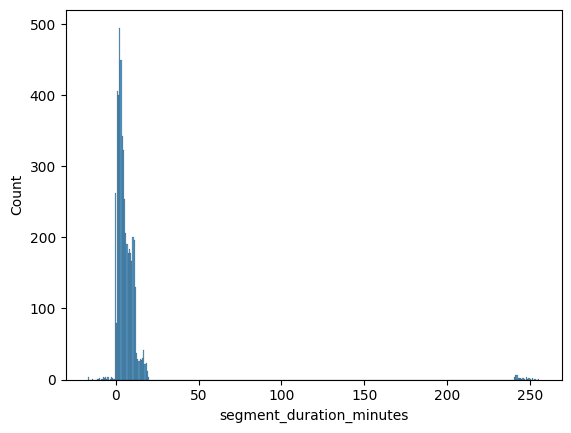

In [ ]:
sns.histplot(route_segments['segment_duration_minutes'])

Deleting extreme values or values below zero.

In [ ]:
route_segments['flag_long_duration'] = route_segments['segment_duration_minutes'] > 25
route_segments['rounded_segment_duration'] = route_segments['segment_duration_minutes'].apply(np.ceil).astype(int)

index_to_drop = route_segments[route_segments['segment_duration'] == 0].index
route_segments.drop(index=index_to_drop, inplace=True)

index_to_drop = route_segments[route_segments['segment_duration_minutes'] >= 25].index
route_segments.drop(index=index_to_drop, inplace=True)

route_segments = route_segments[(route_segments['segment_duration_minutes'] >= 0 ) ]
short_duration = route_segments[(route_segments['flag_long_duration'] == False) ]
long_duration = route_segments[ (route_segments['flag_long_duration'] == True) ]

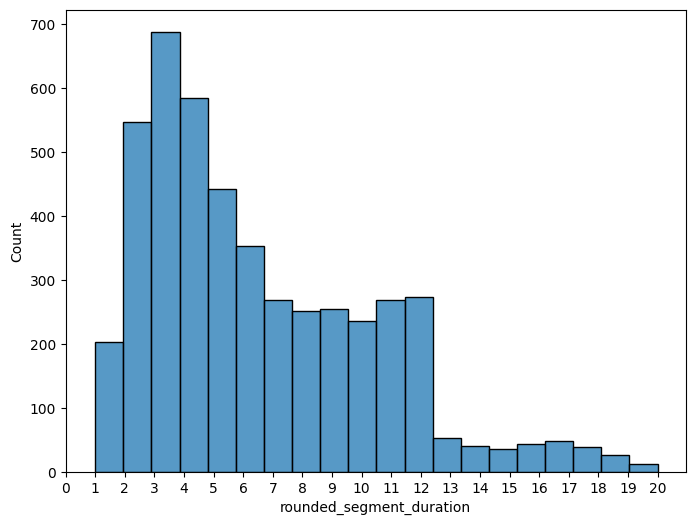

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(route_segments['rounded_segment_duration'], bins=20)
plt.xticks(range(0, 21, 1))
plt.show()

(array([365., 592., 476., 302., 192.,  92.,  42.,  26.,   8.,   6.]),
 array([-170. , -101.6,  -33.2,   35.2,  103.6,  172. ,  240.4,  308.8,
         377.2,  445.6,  514. ]),
 <BarContainer object of 10 artists>)

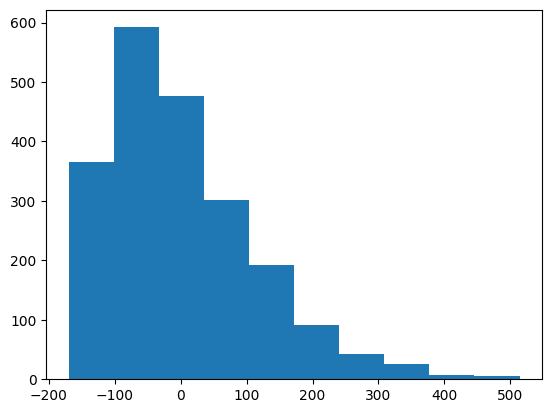

In [ ]:
merged_df = pd.merge(orders, route_segments, on='order_id')

merged_df['duration_error'] = (merged_df['segment_duration'] - merged_df['planned_delivery_duration'] )
plt.hist(merged_df['duration_error'])

<BarContainer object of 2101 artists>

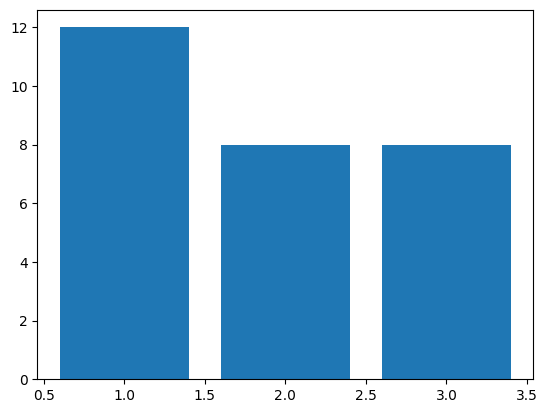

In [ ]:
plt.bar(merged_df['sector_id'], merged_df['rounded_segment_duration'])

<BarContainer object of 2101 artists>

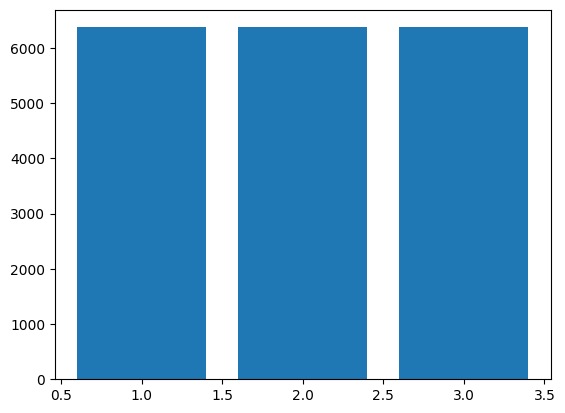

In [ ]:
plt.bar(merged_df['sector_id'], merged_df['duration_error'].agg('sum'))

**Data analysis**

Trying to visually notice certain features

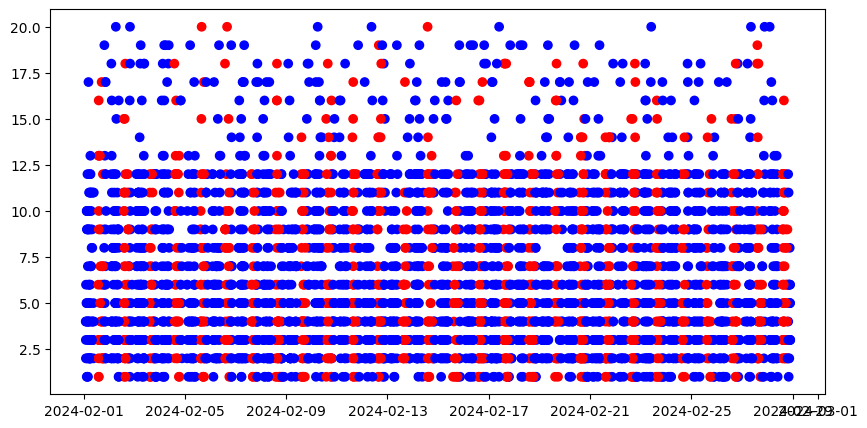

In [ ]:
plt.figure(figsize=(10,5))
route_segments['segment_end_hour'] = route_segments['segment_end_time'].dt.strftime('%T')
route_segments['end_hour_flag'] = np.where(
    (route_segments['segment_end_time'].dt.hour >= 13) & (route_segments['segment_end_time'].dt.hour <= 18), True, False)

colors = ['red' if flag else 'blue' for flag in route_segments['end_hour_flag']]
plt.scatter(route_segments['segment_end_time'], route_segments['rounded_segment_duration'], color=colors)

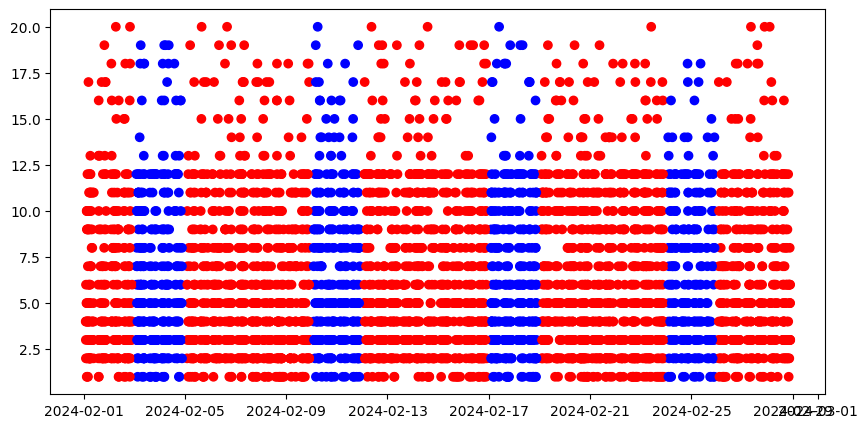

In [ ]:
plt.figure(figsize=(10,5))
route_segments['segment_end_hour'] = route_segments['segment_end_time'].dt.strftime('%T')
route_segments['end_hour_flag'] = np.where(
    (route_segments['segment_end_time'].dt.weekday >= 0) & (route_segments['segment_end_time'].dt.weekday <= 4), True, False)

colors = ['red' if flag else 'blue' for flag in route_segments['end_hour_flag']]
plt.scatter(route_segments['segment_end_time'], route_segments['rounded_segment_duration'], color=colors)

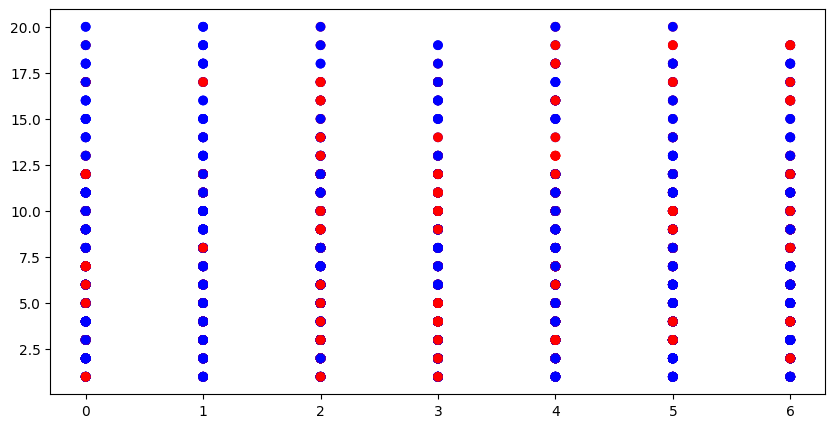

In [ ]:
plt.figure(figsize=(10,5))
route_segments['segment_end_day'] = route_segments['segment_end_time'].dt.weekday
route_segments['end_day_flag'] = np.where(
    (route_segments['segment_end_time'].dt.hour >= 0) & (route_segments['segment_end_time'].dt.hour <= 6), True, False)

colors = ['red' if flag else 'blue' for flag in route_segments['end_day_flag']]
plt.scatter(route_segments['segment_end_day'], route_segments['rounded_segment_duration'], color=colors)

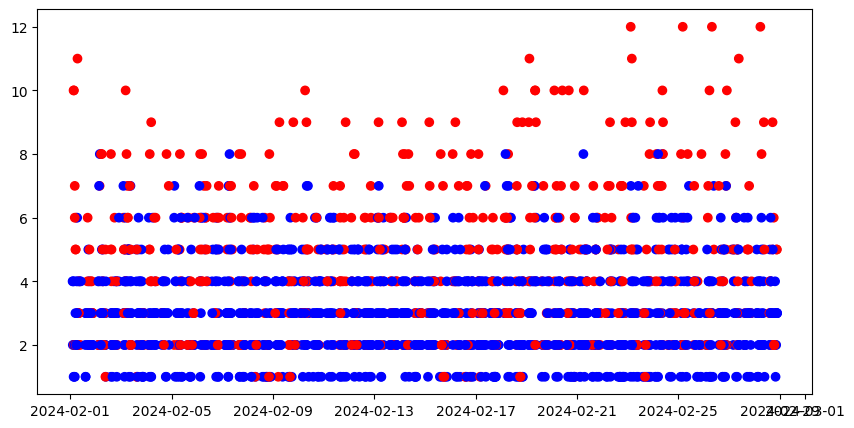

In [ ]:
plt.figure(figsize=(10,5))
merged_df['sector_flag'] = np.where(merged_df['sector_id'] == 1, True, False)

colors = ['red' if flag else 'blue' for flag in merged_df['sector_flag']]
plt.scatter(merged_df['segment_end_time'], merged_df['rounded_segment_duration'], color=colors)

I can see that for sector_id=1 there are more higher values. I will visualize that in the other way:

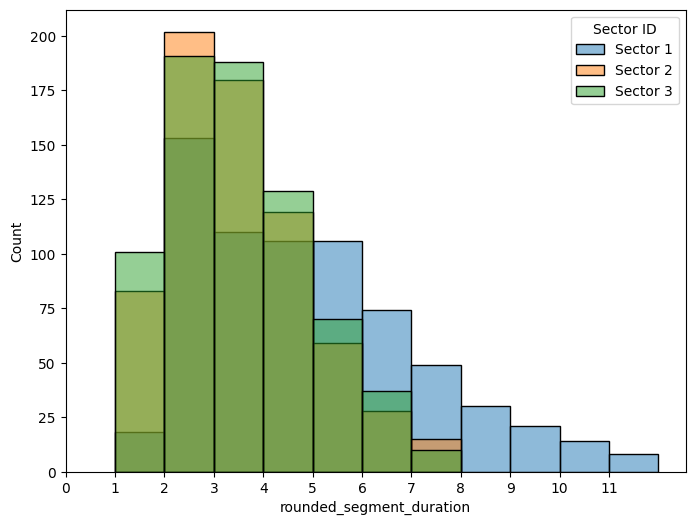

In [ ]:
sectors = [1,2,3]

plt.figure(figsize=(8, 6))

for sector_id in sectors:
    war = (merged_df['segment_duration_minutes'] >= 0) & (merged_df['sector_id'] == sector_id)
    subset = merged_df[war]['rounded_segment_duration']
    sns.histplot(subset, bins=12, binwidth=1, alpha=0.5, label=f'Sector {sector_id}')

plt.xticks(range(0, 12))
plt.legend(title='Sector ID')
plt.show()

<Axes: >

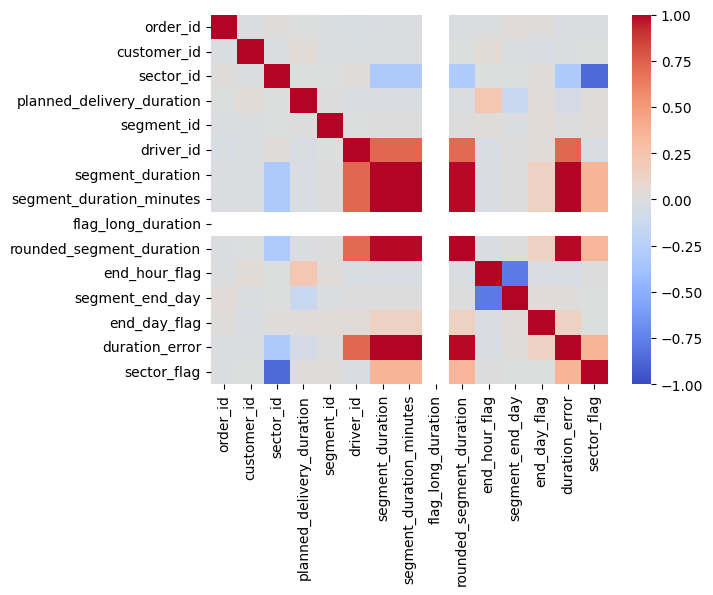

In [ ]:
sns.heatmap(merged_df.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm")

A correlation map helps to visualize which columns may be important

In [ ]:
merged_df.groupby(['sector_id','driver_id']).mean(numeric_only=True)

order_id  customer_id  planned_delivery_duration  \
sector_id driver_id                                                        
1         1          1134.821053   168.331579                 176.800000   
          2          1124.814371   167.461078                 177.652695   
          3          1074.892857   146.476190                 176.660714   
          4          1084.432927   158.542683                 176.792683   
2         1          1152.006623   166.165563                 177.066225   
          2          1072.783626   157.824561                 177.339181   
          3          1155.967568   167.681081                 176.427027   
          4          1122.670391   166.162011                 176.497207   
3         1          1192.355330   160.873096                 177.182741   
          2          1151.458065   152.167742                 176.948387   
          3          1111.357513   150.367876                 176.704663   
          4          1039.961326   167.309392                 176.762431   

                      segment_id  segment_duration  segment_duration_minutes  \
sector_id driver_id                                                            
1         1          2488.284211         95.810526                  1.596842   
          2          2482.946108        196.197605                  3.269960   
          3          2601.208333        285.625000                  4.760417   
          4          2535.652439        391.987805                  6.533130   
2         1          2481.251656         60.980132                  1.016336   
          2          2419.210526        114.584795                  1.909747   
          3          2335.281081        173.778378                  2.896306   
          4          2579.832402        241.458101                  4.024302   
3         1          2495.994924         60.802030                  1.013367   
          2          2681.548387        121.296774                  2.021613   
          3          2522.145078        181.336788                  3.022280   
          4          2373.060773        247.729282                  4.128821   

                     flag_long_duration  rounded_segment_duration  \
sector_id driver_id                                                 
1         1                         0.0                  2.094737   
          2                         0.0                  3.778443   
          3                         0.0                  5.232143   
          4                         0.0                  7.000000   
2         1                         0.0                  1.476821   
          2                         0.0                  2.409357   
          3                         0.0                  3.400000   
          4                         0.0                  4.519553   
3         1                         0.0                  1.497462   
          2                         0.0                  2.561290   
          3                         0.0                  3.523316   
          4                         0.0                  4.624309   

                     end_hour_flag  segment_end_day  end_day_flag  \
sector_id driver_id                                                 
1         1               0.747368         3.000000      0.273684   
          2               0.712575         3.000000      0.263473   
          3               0.660714         3.119048      0.357143   
          4               0.750000         2.823171      0.365854   
2         1               0.701987         3.139073      0.304636   
          2               0.742690         2.994152      0.292398   
          3               0.708108         3.027027      0.345946   
          4               0.687151         3.011173      0.290503   
3         1               0.746193         2.939086      0.314721   
          2               0.787097         2.561290      0.277419   
          3               0.663212         

When data is group by driver_id, I can see some pattern in the mean of segment duration. I will show it now:

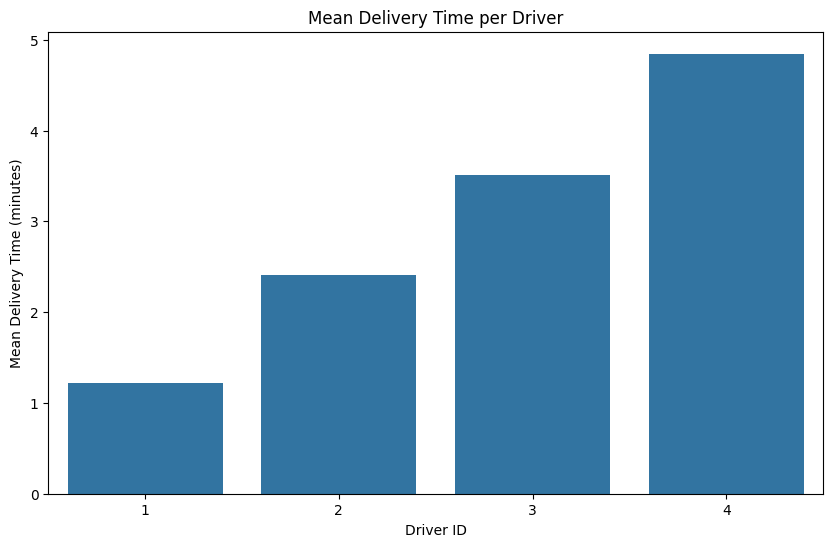

In [ ]:
driver_means = merged_df.groupby('driver_id')['segment_duration_minutes'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=driver_means, x='driver_id', y='segment_duration_minutes')
plt.title('Mean Delivery time per Driver')
plt.xlabel('Driver ID')
plt.ylabel('Mean Delivery time')
plt.show()

**Summary**

After analyzing the data in various ways, I noticed the following:
* The sector_id = 1 has more longer delivery periods
* The average delivery time for different drivers varies
* The average delivery time error does not help us find patterns

In plain data there are some extreme values or values below zero that I did not included into analisis.
